## DATA 602: Final Project Proposal


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

[fits file astropy docs](https://docs.astropy.org/en/stable/io/fits/index.html)

In [32]:
file_path = "/Users/andrewbowen/Downloads/16714/primary/pcadf16714_000N001_asol1.fits"

In [33]:
# with fits.open(file_path) as hdul:
#     hdul.info()
#     dat = fits.getdata(hdul, ext=0)

In [34]:
image_file = get_pkg_data_filename(file_path)
image_data = fits.getdata(image_file, ext=0)

IndexError: No data in HDU #0.

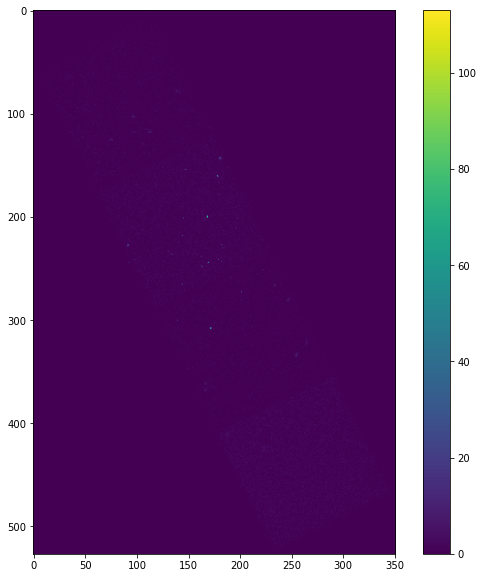

In [35]:
# plotting fit s image data
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='viridis')
plt.colorbar()

In [37]:
fits_path = "/Users/andrewbowen/Downloads/16714/primary"
for f in os.listdir(fits_path):
    if "fits" in f:
        filepath = os.path.join(fits_path, f)
        print(filepath)

        image_file = get_pkg_data_filename(filepath)
        image_data = fits.getdata(image_file, ext=0)

        # plotting fit s image data
        plt.figure(figsize=(10,10))
        plt.imshow(image_data, cmap='viridis')
        plt.colorbar()

/Users/andrewbowen/Downloads/16714/primary/pcadf16714_000N001_asol1.fits


IndexError: No data in HDU #0.